## All Sample 4 data analysis (CSIO & Imprisonment data only)

Examine options for using electronic monitoring (EM) of offenders in WA as an alternative to custodial sentences.

## Logistic Regression

The logistic model is a widely used statistical model that uses a logistic function to model a binary dependent variable. In regression analysis, logistic regression is estimating the parameters of a logistic model; it is a form of binomial regression. <br>
Mathematically, a binary logistic model has a dependent variable with two possible values represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable or a continuous variable.

The corresponding probability  of the value labeled "1" can vary between 0 and 1, the function that converts log-odds to probability is the logistic function.  The defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each dependent variable having its own parameter, for  binary independent variable this generalises the odds ratio.

Use logistic regression as a method for classification; convention have a class 0 or 1.
Sigmoid is the logistic function, takes any value output between 0 and 1.
Use a confusion matrix to explain results. (TP/TN/FP/FN) 

Before running a logistic regression, need to prep the data
* Check for missing values (use imputation if there is a small % of missing values
* Clean the data into an acceptable form
* Convert categorical into dummies (0 or 1)
* Train / Test split (y = column trying to predict)

### Imports

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# File system management
import os

# matplotlib for display
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for visualisation
import seaborn as sns

#Import Datetime
from datetime import datetime

# Import a counter
from collections import Counter

In [2]:
os.getcwd()

'C:\\Users\\Kalmerrick\\Documents\\JC Treasury Analysis\\CSIO'

In [3]:
PATH = 'Data/'

In [4]:
os.listdir(PATH)

['All Sample v4 csioImp.csv',
 'All Sample v4.csv',
 'Community Orders.xlsx',
 'penaltyCountDaily.csv',
 'penaltyCountDailyPlay.xlsx',
 'PenaltyCountJuris_raw.csv',
 'PenaltyCountJuris_raw_analysis.xlsx',
 'penaltyCountMonthly.csv']

## The data

In [5]:
#import csv and parse dates for timeseries analysis
train = pd.read_csv(f'{PATH}All Sample v4 csioImp.csv', low_memory=False, parse_dates=['GroupCaseStart', 'GroupCaseEnd', 'FinalisationDate'])

In [6]:
# Function that displays all the columns of a data frame
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df.head(10))

In [7]:
train.shape

(35522, 367)

In [8]:
train.head()

,ParticipantGroupID,GroupID,GroupHeadCase,CaseID,GroupCaseCount,GroupPrisonCaseCount,GroupCaseStart,GroupCaseEnd,GroupDaysToEnd,ParticipantID,...,MinSumTrl,HearingsComToTrial,MinMeanComTrl,MinSumComTrl,HearingsComToFinal,MinMeanComFnl,MinSumComFnl,HearingsTrlToFinal,MinMeanTrlFnl,MinSumTrlFnl
0,BD3EF3D3-A6A8-4A4E-AB24-389B86301ECB-1,1,YES,1,1,1.0,1995-02-24,1995-03-17,22,BD3EF3D3-A6A8-4A4E-AB24-389B86301ECB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DBE98871-FD45-48D6-BE6A-7BABA30839AE-1,1,YES,1,1,1.0,1999-08-31,1999-08-31,1,DBE98871-FD45-48D6-BE6A-7BABA30839AE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4D6A7288-6F06-4A41-B818-DC551718D1BD-1,1,YES,1,1,1.0,2000-05-16,2000-12-12,211,4D6A7288-6F06-4A41-B818-DC551718D1BD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10720EF4-D326-42E4-8CE7-B2E3BE585761-1,1,YES,1,1,1.0,2002-01-02,2002-01-02,1,10720EF4-D326-42E4-8CE7-B2E3BE585761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02F375C5-BB5B-470B-A983-BDDF0108404B-1,1,YES,1,1,1.0,2003-08-10,2007-08-29,1422,02F375C5-BB5B-470B-A983-BDDF0108404B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35522 entries, 0 to 35521
Columns: 367 entries, ParticipantGroupID to MinSumTrlFnl
dtypes: datetime64[ns](3), float64(265), int64(11), object(88)
memory usage: 99.5+ MB


In [10]:
display_all(train.describe())

,GroupID,CaseID,GroupCaseCount,GroupPrisonCaseCount,GroupDaysToEnd,SID,ANZSOCCode,nationalOffenceIndex,FirstHearingMinutes,MOFCode,DaysToFinalise,PreCommittalPleaDelay,CommittalDelay,CommittalHearingMinutes,PreTrialPleaDelay,TrialDays,TrialDelay,TimeToTrial,TrialMinutes,PostTrialPleaDelay,WithdrawDate,WithdrawnAt,WithdrawDelay,SentenceDelay,SentenceHearingMinutes,SentenceDays,AdjustedSentenceDays,GroupSentenceDays,GroupPropServed,GroupPropServedAdjusted,GroupAdjustedMaxSentenceDays,GroupAdjustedSentenceDays,GroupRemandDays,GroupRemandProp,RemandReceptions,PrisonReceptions,SuspensionDays,Fines,Costs,OtherFinancialPenalties,GroupParoleCount,GroupParoleLength,GroupAvgParoleDelay,GroupParoleBreach,GroupAvgParoleBreachDelay,GroupAvgParoleBreachStay,GroupParoleEligibleDuration,BreachCount,FirstBreachDelay,LastBreachDelay,BreachSentenceDays,BreachSuspensionDays,BreachFines,BreachCosts,BreachOtherFinancialPenalties,LC_MOFCode,HC_MOFCode,AdjustedCaseHearingsToFinaliseMC,AdjustedCaseHearingsToFinaliseDC,AdjustedCaseHearingsToFinaliseSC,UniqueHearingAdjustmentMC,UniqueHearingAdjustmentDC,UniqueHearingAdjustmentSC,GroupCommittals,GroupUniqueCommittals,UniqueCommittalAdjustment,GroupPTrialsMC,GroupNTrialsMC,GroupPTrialMCMinMean,GroupNTrialMCMinMean,GroupPTrialMCMinSum,GroupNTrialMCMinSum,GroupPTrialMCDayMean,GroupNTrialMCDayMean,GroupPTrialMCDaySum,GroupNTrialMCDaySum,GroupPTrialsDC,GroupNTrialsDC,GroupPTrialDCMinMean,GroupNTrialDCMinMean,GroupPTrialDCMinSum,GroupNTrialDCMinSum,GroupPTrialDCDayMean,GroupNTrialDCDayMean,GroupPTrialDCDaySum,GroupNTrialDCDaySum,GroupPTrialsSC,GroupNTrialsSC,GroupPTrialSCMinMean,GroupNTrialSCMinMean,GroupPTrialSCMinSum,GroupNTrialSCMinSum,GroupPTrialSCDayMean,GroupNTrialSCDayMean,GroupPTrialSCDaySum,GroupNTrialSCDaySum,GroupUniquePTrialsMC,GroupUniqueNTrialsMC,UniquePTrialAdjustmentMC,UniqueNTrialAdjustmentMC,GroupUniquePTrialMCMinMean,GroupUniqueNTrialMCMinMean,GroupUniquePTrialMCMinSum,GroupUniqueNTrialMCMinSum,GroupUniquePTrialMCDayMean,GroupUniqueNTrialMCDayMean,GroupUniquePTrialMCDaySum,GroupUniqueNTrialMCDaySum,GroupUniquePTrialsDC,GroupUniqueNTrialsDC,UniquePTrialAdjustmentDC,UniqueNTrialAdjustmentDC,GroupUniquePTrialDCMinMean,GroupUniqueNTrialDCMinMean,GroupUniquePTrialDCMinSum,GroupUniqueNTrialDCMinSum,GroupUniquePTrialDCDayMean,GroupUniqueNTrialDCDayMean,GroupUniquePTrialDCDaySum,GroupUniqueNTrialDCDaySum,GroupUniquePTrialsSC,GroupUniqueNTrialsSC,UniquePTrialAdjustmentSC,UniqueNTrialAdjustmentSC,GroupUniquePTrialSCMinMean,GroupUniqueNTrialSCMinMean,GroupUniquePTrialSCMinSum,GroupUniqueNTrialSCMinSum,GroupUniquePTrialSCDayMean,GroupUniqueNTrialSCDayMean,GroupUniquePTrialSCDaySum,GroupUniqueNTrialSCDaySum,OtherPTrialMC,OtherNTrialMC,OtherPTrialMCMinMean,OtherNTrialMCMinMean,OtherPTrialMCDayMean,OtherNTrialMCDayMean,OtherPTrialMCMinSum,OtherNTrialMCMinSum,OtherPTrialMCDaySum,OtherNTrialMCDaySum,GroupOtherPTrialMCMinMean,GroupOtherNTrialMCMinMean,GroupOtherPTrialMCDayMean,GroupOtherNTrialMCDayMean,GroupOtherPTrialMCMinSum,GroupOtherNTrialMCMinSum,GroupOtherPTrialMCDaySum,GroupOtherNTrialMCDaySum,OtherPTrialDC,OtherNTrialDC,OtherPTrialDCMinMean,OtherNTrialDCMinMean,OtherPTrialDCDayMean,OtherNTrialDCDayMean,OtherPTrialDCMinSum,OtherNTrialDCMinSum,OtherPTrialDCDaySum,OtherNTrialDCDaySum,GroupOtherPTrialDCMinMean,GroupOtherNTrialDCMinMean,GroupOtherPTrialDCDayMean,GroupOtherNTrialDCDayMean,GroupOtherPTrialDCMinSum,GroupOtherNTrialDCMinSum,GroupOtherPTrialDCDaySum,GroupOtherNTrialDCDaySum,OtherPTrialSC,OtherNTrialSC,OtherPTrialSCMinMean,OtherNTrialSCMinMean,OtherPTrialSCDayMean,OtherNTrialSCDayMean,OtherPTrialSCMinSum,OtherNTrialSCMinSum,OtherPTrialSCDaySum,OtherNTrialSCDaySum,GroupOtherPTrialSCMinMean,GroupOtherNTrialSCMinMean,GroupOtherPTrialSCDayMean,GroupOtherNTrialSCDayMean,GroupOtherPTrialSCMinSum,GroupOtherNTrialSCMinSum,GroupOtherPTrialSCDaySum,GroupOtherNTrialSCDaySum,GroupOtherPTrialsMC,GroupOtherNTrialsMC,GroupUniqueOtherPTrialsMC,GroupUniqueOtherNTrialsMC,UniqueOtherPMCAdjustment,UniqueOtherNMCAdj

In [11]:
print("train -  rows:",train.shape[0]," columns:", train.shape[1])

train -  rows: 35522  columns: 367


## Missing Data

In [12]:
# get the number of missing data points per column
missing_values_count =  train.isnull().sum()
# look at the # of missing points in the first ten columns
display_all(missing_values_count.sort_values(ascending=False))

WithdrawDelay           35522
WithdrawDate            35522
WithdrawnAt             35522
OtherNTrialSCDaySum     35504
OtherNTrialSCMinSum     35504
OtherNTrialSCDayMean    35504
OtherNTrialSCMinMean    35504
OtherPTrialSCDaySum     35496
OtherPTrialSCMinSum     35496
OtherPTrialSCDayMean    35496
dtype: int64

In [13]:
# how many total missing values do we have?
total_cells = np.product(train.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

69.97064566196609

In [14]:
# remove all columns with at least one missing value
train.dropna(axis=1, inplace = True)

In [15]:
train.shape

(35522, 39)

In [16]:
train.head()

,ParticipantGroupID,GroupID,CaseID,GroupCaseCount,GroupCaseStart,GroupCaseEnd,GroupDaysToEnd,ParticipantID,SLK,DOB,...,SentenceDelay,SentenceJurisdiction,SentenceType,IsSentencedCustodial,SentenceDays,AdjustedSentenceDays,SentenceExpiryDate,IsRemanded,RemandReceptions,PrisonReceptions
0,BD3EF3D3-A6A8-4A4E-AB24-389B86301ECB-1,1,1,1,1995-02-24,1995-03-17,22,BD3EF3D3-A6A8-4A4E-AB24-389B86301ECB,SE2AR130219582,13/02/1958,...,21,MC,Imprisonment,YES,122.0,121.0,15/07/1995,NO,0,1
1,DBE98871-FD45-48D6-BE6A-7BABA30839AE-1,1,1,1,1999-08-31,1999-08-31,1,DBE98871-FD45-48D6-BE6A-7BABA30839AE,ALBMI250919792,25/09/1979,...,0,DC,Imprisonment,YES,365.0,366.0,30/08/2000,NO,0,1
2,4D6A7288-6F06-4A41-B818-DC551718D1BD-1,1,1,1,2000-05-16,2000-12-12,211,4D6A7288-6F06-4A41-B818-DC551718D1BD,MIHAE301119752,30/11/1975,...,210,MC,Imprisonment,YES,91.0,91.0,12/03/2001,NO,0,1
3,10720EF4-D326-42E4-8CE7-B2E3BE585761-1,1,1,1,2002-01-02,2002-01-02,1,10720EF4-D326-42E4-8CE7-B2E3BE585761,EWOIC100219761,10/02/1976,...,0,SC,Imprisonment,YES,1644.0,1643.0,1/08/2006,NO,0,1
4,02F375C5-BB5B-470B-A983-BDDF0108404B-1,1,1,1,2003-08-10,2007-08-29,1422,02F375C5-BB5B-470B-A983-BDDF0108404B,RAKOT131019591,13/10/1959,...,30,DC,Imprisonment,YES,974.0,974.0,28/04/2010,NO,0,1


## Exploratory Data Analysis

In [17]:
train['SentenceType'].value_counts()

Imprisonment                                33557
Conditional Suspended Imprisonment Order     1965
Name: SentenceType, dtype: int64

In [18]:
train['SentenceType'].value_counts(normalize=True)

Imprisonment                                0.944682
Conditional Suspended Imprisonment Order    0.055318
Name: SentenceType, dtype: float64

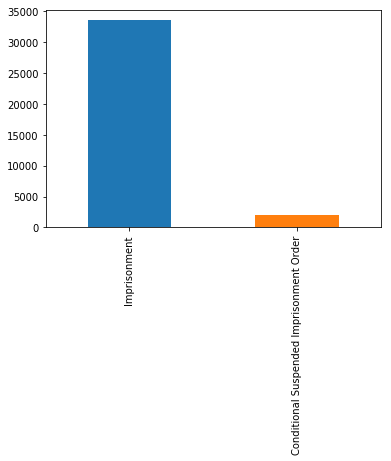

In [19]:
train['SentenceType'].value_counts().plot(kind='bar')

In [20]:
train[train['SentenceType'] == 'Conditional Suspended Imprisonment Order']['Gender'].value_counts(normalize=True)

Male      0.805598
Female    0.194402
Name: Gender, dtype: float64

In [21]:
train.groupby('SentenceType').Gender.value_counts()

SentenceType                              Gender
Conditional Suspended Imprisonment Order  Male       1583
                                          Female      382
Imprisonment                              Male      29086
                                          Female     4471
Name: Gender, dtype: int64

In [22]:
# There are 1911 unique ids from the 1965
train['ParticipantID'][train['SentenceType'] =='Conditional Suspended Imprisonment Order'].nunique()
#participant_csio.duplicated()

1911

In [23]:
train.groupby('SentenceType').Gender.value_counts(normalize=True)

SentenceType                              Gender
Conditional Suspended Imprisonment Order  Male      0.805598
                                          Female    0.194402
Imprisonment                              Male      0.866764
                                          Female    0.133236
Name: Gender, dtype: float64

In [24]:
# There are 54 duplicated Ids
train['ParticipantID'][train['SentenceType'] =='Conditional Suspended Imprisonment Order'][train['ParticipantID'][train['SentenceType'] =='Conditional Suspended Imprisonment Order'].duplicated()].count()

54

(array([ 1678., 10699.,  4145.,  6528.,  2972.,   860.,   587.,  4696.,
          782.,  2575.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

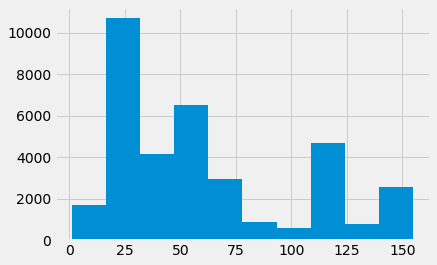

In [25]:
# Set the style of plots
plt.style.use('fivethirtyeight')
plt.hist(train['nationalOffenceIndex'])

In [26]:
display_all(train.head())

,ParticipantGroupID,GroupID,CaseID,GroupCaseCount,GroupCaseStart,GroupCaseEnd,GroupDaysToEnd,ParticipantID,SLK,DOB,Gender,ChargeID,OTSection,LegislationName,OffenceType,ANZSOCCode,ANZSOCOffenceType,nationalOffenceIndex,IsSimple,FirstActualHearingDate,LodgementDate,LodgementJurisdiction,MOFCode,FinalisationDate,DaysToFinalise,FirstHearingPlea,HadCommittalHearing,Withdrawn,SentenceDate,SentenceDelay,SentenceJurisdiction,SentenceType,IsSentencedCustodial,SentenceDays,AdjustedSentenceDays,SentenceExpiryDate,IsRemanded,RemandReceptions,PrisonReceptions
0,BD3EF3D3-A6A8-4A4E-AB24-389B86301ECB-1,1,1,1,1995-02-24,1995-03-17,22,BD3EF3D3-A6A8-4A4E-AB24-389B86301ECB,SE2AR130219582,13/02/1958,Female,7E378F54-82AE-49BD-881C-6D9D54C946F8,378,Criminal Code (WA),Stealing,829,"Theft (except motor vehicles), nec",75,YES,24/02/1995,24/02/1995,MC,112,1995-03-17,21,GUILTY,NO,NO,17/03/1995,21,MC,Imprisonment,YES,122.0,121.0,15/07/1995,NO,0,1
1,DBE98871-FD45-48D6-BE6A-7BABA30839AE-1,1,1,1,1999-08-31,1999-08-31,1,DBE98871-FD45-48D6-BE6A-7BABA30839AE,ALBMI250919792,25/09/1979,Female,426924AD-6739-474E-A6D8-F32E0698BB5D,401,Criminal Code (WA),Burglary w/int enter place whilst in company o...,711,"Unlawful entry with intent/burglary, break and...",59,NO,31/08/1999,28/06/1999,DC,112,1999-08-31,0,GUILTY,NO,NO,31/08/1999,0,DC,Imprisonment,YES,365.0,366.0,30/08/2000,NO,0,1
2,4D6A7288-6F06-4A41-B818-DC551718D1BD-1,1,1,1,2000-05-16,2000-12-12,211,4D6A7288-6F06-4A41-B818-DC551718D1BD,MIHAE301119752,30/11/1975,Female,5B2B830E-E5E2-4D3F-881C-2DCE062D6FB9,49,Road Traffic Act 1974,No Driver's Licence (Suspended Fines).,1412,Drive without a licence,142,YES,16/05/2000,16/05/2000,MC,112,2000-12-12,210,NOT GUILTY,NO,NO,12/12/2000,210,MC,Imprisonment,YES,91.0,91.0,12/03/2001,NO,0,1
3,10720EF4-D326-42E4-8CE7-B2E3BE585761-1,1,1,1,2002-01-02,2002-01-02,1,10720EF4-D326-42E4-8CE7-B2E3BE585761,EWOIC100219761,10/02/1976,Male,19A0752D-93EC-4651-896F-1E800EA4779D,391,Criminal Code (WA),Stealing With Violence,611,Aggravated robbery,25,NO,1/02/2002,10/12/2001,SC,112,2002-01-02,0,GUILTY,NO,NO,1/02/2002,0,SC,Imprisonment,YES,1644.0,1643.0,1/08/2006,NO,0,1
4,02F375C5-BB5B-470B-A983-BDDF0108404B-1,1,1,1,2003-08-10,2007-08-29,1422,02F375C5-BB5B-470B-A983-BDDF0108404B,RAKOT131019591,13/10/1959,Male,FE65909F-B6C9-4DB6-91A1-5251AFB2091F,7,Misuse Of Drugs Act 1981,Cultivation Of Cannabis With Intent,1032,Cultivate illicit drugs,19,NO,8/10/2003,21/08/2003,DC,111,2007-08-29,1421,NOT GUILTY,NO,NO,29/08/2007,30,DC,Imprisonment,YES,974.0,974.0,28/04/2010,NO,0,1


In [27]:
#train.isnull().values.any().any()
# Removed any columns with null values
train.isnull().values.any()

False

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35522 entries, 0 to 35521
Data columns (total 39 columns):
ParticipantGroupID        35522 non-null object
GroupID                   35522 non-null int64
CaseID                    35522 non-null int64
GroupCaseCount            35522 non-null int64
GroupCaseStart            35522 non-null datetime64[ns]
GroupCaseEnd              35522 non-null datetime64[ns]
GroupDaysToEnd            35522 non-null int64
ParticipantID             35522 non-null object
SLK                       35522 non-null object
DOB                       35522 non-null object
Gender                    35522 non-null object
ChargeID                  35522 non-null object
OTSection                 35522 non-null object
LegislationName           35522 non-null object
OffenceType               35522 non-null object
ANZSOCCode                35522 non-null int64
ANZSOCOffenceType         35522 non-null object
nationalOffenceIndex      35522 non-null int64
IsSimple         

In [29]:
# Drop insignificant columns
train.drop(['ParticipantGroupID','GroupID','CaseID','GroupCaseStart','GroupCaseEnd','ParticipantID',
           'SLK','DOB','ChargeID','OTSection','LegislationName','OffenceType','ANZSOCOffenceType',
           'FirstActualHearingDate', 'LodgementDate', 'FinalisationDate','SentenceDate','SentenceExpiryDate',
           'Withdrawn','FirstHearingPlea'], axis=1,inplace=True)

In [30]:
display_all(train.head())

,GroupCaseCount,GroupDaysToEnd,Gender,ANZSOCCode,nationalOffenceIndex,IsSimple,LodgementJurisdiction,MOFCode,DaysToFinalise,HadCommittalHearing,SentenceDelay,SentenceJurisdiction,SentenceType,IsSentencedCustodial,SentenceDays,AdjustedSentenceDays,IsRemanded,RemandReceptions,PrisonReceptions
0,1,22,Female,829,75,YES,MC,112,21,NO,21,MC,Imprisonment,YES,122.0,121.0,NO,0,1
1,1,1,Female,711,59,NO,DC,112,0,NO,0,DC,Imprisonment,YES,365.0,366.0,NO,0,1
2,1,211,Female,1412,142,YES,MC,112,210,NO,210,MC,Imprisonment,YES,91.0,91.0,NO,0,1
3,1,1,Male,611,25,NO,SC,112,0,NO,0,SC,Imprisonment,YES,1644.0,1643.0,NO,0,1
4,1,1422,Male,1032,19,NO,DC,111,1421,NO,30,DC,Imprisonment,YES,974.0,974.0,NO,0,1


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35522 entries, 0 to 35521
Data columns (total 19 columns):
GroupCaseCount           35522 non-null int64
GroupDaysToEnd           35522 non-null int64
Gender                   35522 non-null object
ANZSOCCode               35522 non-null int64
nationalOffenceIndex     35522 non-null int64
IsSimple                 35522 non-null object
LodgementJurisdiction    35522 non-null object
MOFCode                  35522 non-null int64
DaysToFinalise           35522 non-null int64
HadCommittalHearing      35522 non-null object
SentenceDelay            35522 non-null int64
SentenceJurisdiction     35522 non-null object
SentenceType             35522 non-null object
IsSentencedCustodial     35522 non-null object
SentenceDays             35522 non-null float64
AdjustedSentenceDays     35522 non-null float64
IsRemanded               35522 non-null object
RemandReceptions         35522 non-null int64
PrisonReceptions         35522 non-null int64
dtype

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [32]:
#Check value count for all independent variables
train['LodgementJurisdiction'].value_counts()

MC    31360
DC     3647
SC      515
Name: LodgementJurisdiction, dtype: int64

Convert binary object variables to booleans, to make them more convenient for modeling. 

In [33]:
train['IsSimple'] = train['IsSimple']=='YES'
train['HadCommittalHearing'] = train['HadCommittalHearing']=='YES'
train['IsSentencedCustodial'] = train['IsSentencedCustodial']=='YES'
train['IsRemanded'] = train['IsRemanded']=='YES'

In [34]:
display_all(train.head())

,GroupCaseCount,GroupDaysToEnd,Gender,ANZSOCCode,nationalOffenceIndex,IsSimple,LodgementJurisdiction,MOFCode,DaysToFinalise,HadCommittalHearing,SentenceDelay,SentenceJurisdiction,SentenceType,IsSentencedCustodial,SentenceDays,AdjustedSentenceDays,IsRemanded,RemandReceptions,PrisonReceptions
0,1,22,Female,829,75,True,MC,112,21,False,21,MC,Imprisonment,True,122.0,121.0,False,0,1
1,1,1,Female,711,59,False,DC,112,0,False,0,DC,Imprisonment,True,365.0,366.0,False,0,1
2,1,211,Female,1412,142,True,MC,112,210,False,210,MC,Imprisonment,True,91.0,91.0,False,0,1
3,1,1,Male,611,25,False,SC,112,0,False,0,SC,Imprisonment,True,1644.0,1643.0,False,0,1
4,1,1422,Male,1032,19,False,DC,111,1421,False,30,DC,Imprisonment,True,974.0,974.0,False,0,1


### Create Dummy Variables

In [35]:
gender = pd.get_dummies(train['Gender'],drop_first=True)
lodgementJurisdiction = pd.get_dummies(train['LodgementJurisdiction'],prefix = 'lodge',drop_first=True)
sentenceJurisdiction = pd.get_dummies(train['SentenceJurisdiction'],drop_first=True)
sentence = pd.get_dummies(train['SentenceType'],drop_first=True)

In [36]:
train.drop(['Gender','LodgementJurisdiction','SentenceJurisdiction', 'SentenceType'],axis=1,inplace=True)

In [37]:
train = pd.concat([train,gender,lodgementJurisdiction,sentenceJurisdiction, sentence],axis=1)

In [38]:
display_all(train.head())

,GroupCaseCount,GroupDaysToEnd,ANZSOCCode,nationalOffenceIndex,IsSimple,MOFCode,DaysToFinalise,HadCommittalHearing,SentenceDelay,IsSentencedCustodial,SentenceDays,AdjustedSentenceDays,IsRemanded,RemandReceptions,PrisonReceptions,Male,lodge_MC,lodge_SC,MC,SC,Imprisonment
0,1,22,829,75,True,112,21,False,21,True,122.0,121.0,False,0,1,0,1,0,1,0,1
1,1,1,711,59,False,112,0,False,0,True,365.0,366.0,False,0,1,0,0,0,0,0,1
2,1,211,1412,142,True,112,210,False,210,True,91.0,91.0,False,0,1,0,1,0,1,0,1
3,1,1,611,25,False,112,0,False,0,True,1644.0,1643.0,False,0,1,1,0,1,0,1,1
4,1,1422,1032,19,False,111,1421,False,30,True,974.0,974.0,False,0,1,1,0,0,0,0,1


### Need to create a dependent variable

Dependent variable created on the following criteria
* Sentence Days not equalled to zero
* MC true
* Groupcase count > 1 (infer repeat offender)
* Imprisonment = 1 (Prison sentence)

In [39]:
train['logiTest'] = (train['SentenceDays'].apply(lambda x : x !=0)) & (train['MC'] == 1) & (train['GroupCaseCount'] > 1) & (train['Imprisonment'] ==1)

In [40]:
train[train['logiTest'] == True].count()

GroupCaseCount          22949
GroupDaysToEnd          22949
ANZSOCCode              22949
nationalOffenceIndex    22949
IsSimple                22949
MOFCode                 22949
DaysToFinalise          22949
HadCommittalHearing     22949
SentenceDelay           22949
IsSentencedCustodial    22949
SentenceDays            22949
AdjustedSentenceDays    22949
IsRemanded              22949
RemandReceptions        22949
PrisonReceptions        22949
Male                    22949
lodge_MC                22949
lodge_SC                22949
MC                      22949
SC                      22949
Imprisonment            22949
logiTest                22949
dtype: int64

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set  

## Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('logiTest',axis=1), 
                                                    train['logiTest'], test_size=0.50, 
                                                    random_state=101)

## Training and Predicting

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
Counter(predictions)

Counter({False: 6276, True: 11485})

## Evaluation

We can check precision,recall,f1-score using classification report!

In [47]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

      False       1.00      0.99      0.99      6353
       True       0.99      1.00      1.00     11408

avg / total       1.00      1.00      1.00     17761



In [48]:
confusion_matrix(y_test,predictions)

array([[ 6276,    77],
       [    0, 11408]], dtype=int64)